In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# Configure plotly renderer for offline notebooks (if needed) and export images
pio.renderers.default = "notebook"
os.makedirs("plots", exist_ok=True)

# Load the dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='latin')  # assume file path
print(f"Data shape: {df.shape}")
df.head()

Data shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# Data info and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
#Checking Duplicates
df.duplicated().sum()

0

In [5]:
# Convert date fields
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']  = pd.to_datetime(df['Ship Date'])

In [6]:
# Shipping delay in days
df['ShipDelayDays'] = (df['Ship Date'] - df['Order Date']).dt.days

# Profit margin (avoid division by zero)
df['Profit Margin'] = df['Profit'] / df['Sales']

# Date parts for analysis
df['Order Month'] = df['Order Date'].dt.month
df['Order Year']  = df['Order Date'].dt.year
df['Order Weekday'] = df['Order Date'].dt.day_name()  # e.g., Monday, Tuesday

# Verify new columns
df[['Order Date','Ship Date','ShipDelayDays','Profit Margin','Order Month','Order Year','Order Weekday']].head()


,Order Date,Ship Date,ShipDelayDays,Profit Margin,Order Month,Order Year,Order Weekday
0,2016-11-08,2016-11-11,3,0.1600,11,2016,Tuesday
1,2016-11-08,2016-11-11,3,0.3000,11,2016,Tuesday
2,2016-06-12,2016-06-16,4,0.4700,6,2016,Sunday
3,2015-10-11,2015-10-18,7,-0.4000,10,2015,Sunday
4,2015-10-11,2015-10-18,7,0.1125,10,2015,Sunday


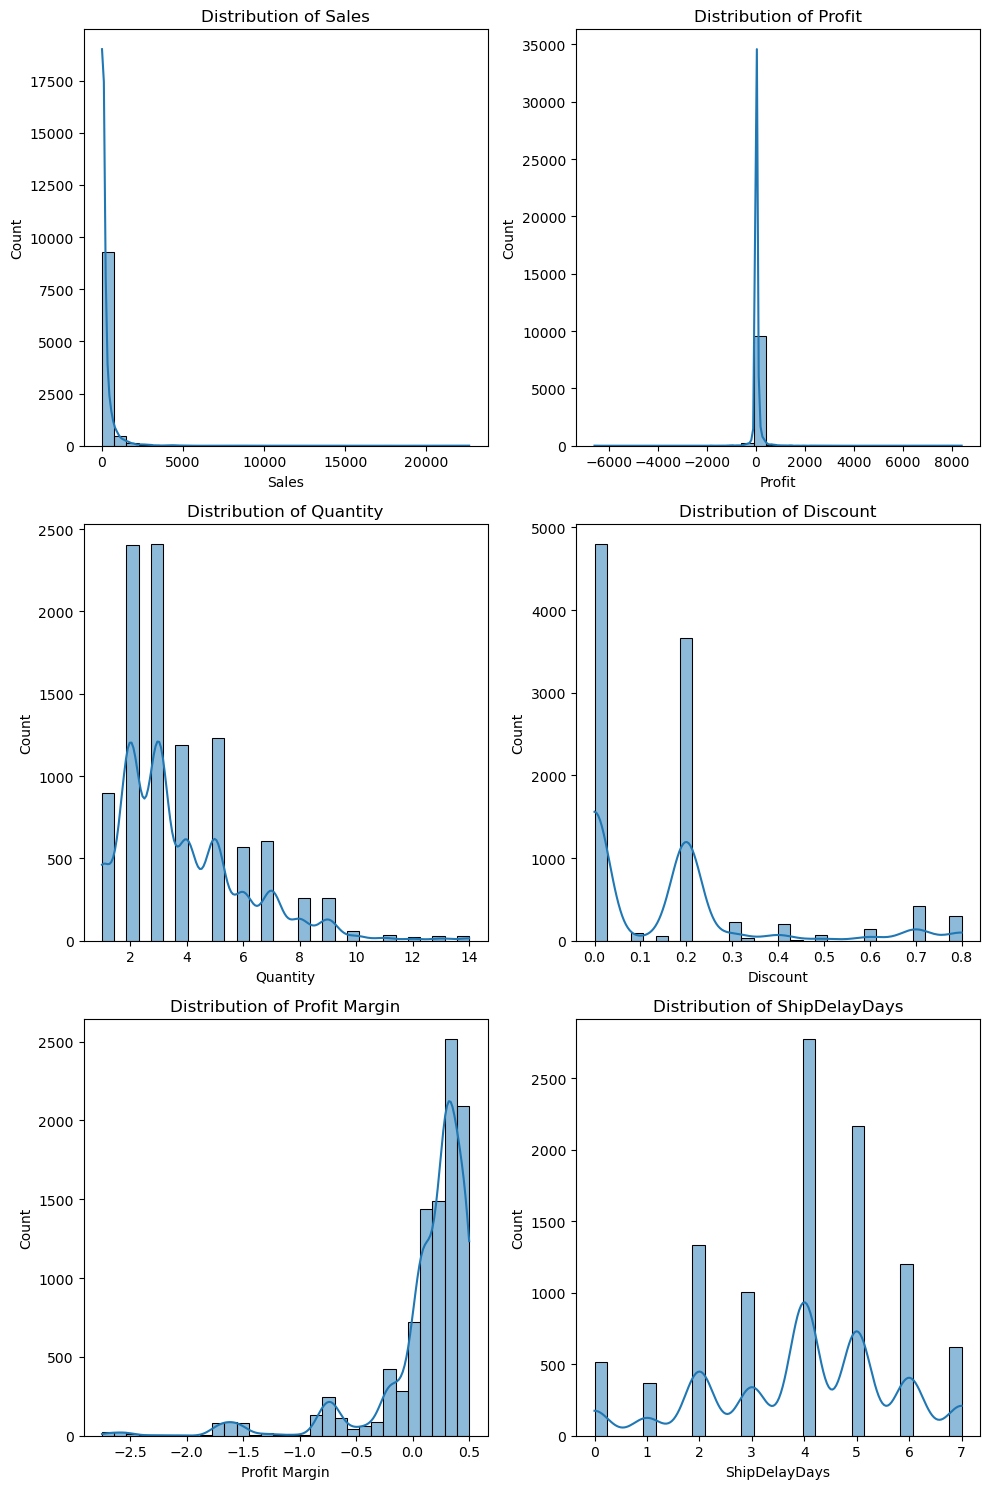

In [7]:
numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Profit Margin', 'ShipDelayDays']
plt.figure(figsize=(10, 15))  # Overall figure size

for i, col in enumerate(numeric_cols, 1):  # Start from 1 for subplot index
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, position i
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.savefig("plots/dist_all_numeric_subplot.png")
plt.show()

Observation:
- Sales and Profit are right-skewed — few large transactions dominate.
- Discounts are mostly at discrete values like 0.2, 0.3, 0.5, and 0.7.
- Profit margin has a long tail of negative values, indicating frequent losses in some segments.
- Quantity typically ranges from 2 to 6 units.
- Ship delay days peak at 2–5 days, aligning with common delivery windows.

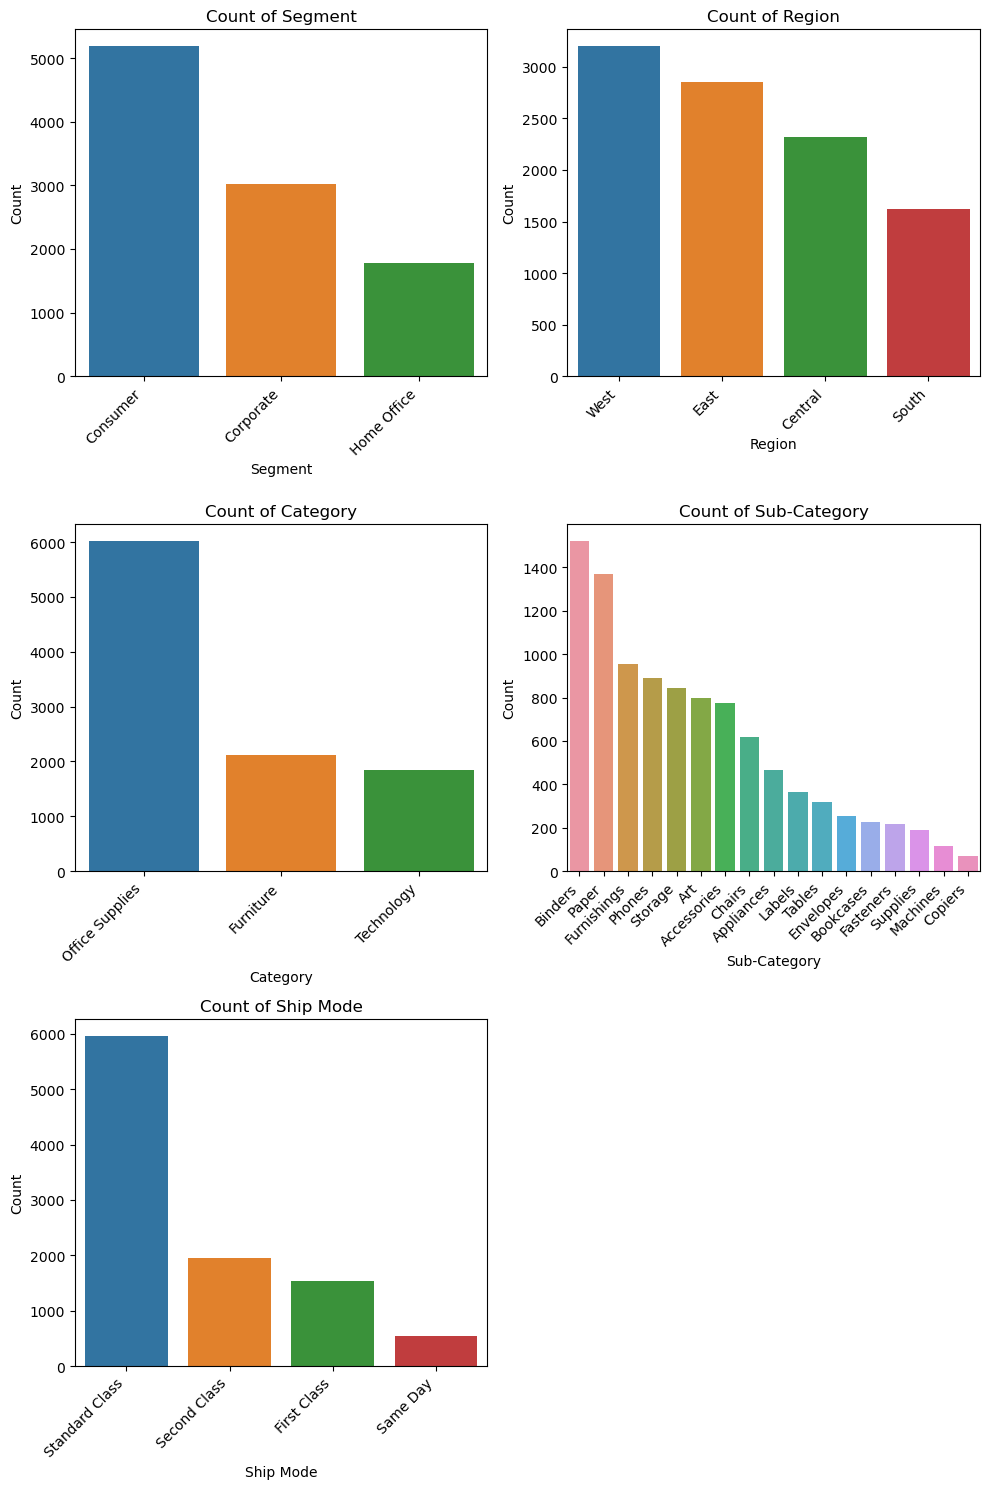

In [8]:
# Univariate categorical: Count plots
cat_cols = ['Segment', 'Region', 'Category', 'Sub-Category', 'Ship Mode']
plt.figure(figsize=(10, 15))  

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i) 
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')  
    
plt.tight_layout()
plt.savefig("plots/count_all_categorical_subplot.png")
plt.show()

Observation:
- Consumer segment is the largest customer base.
- West and East regions contribute most of the data/sales.
- Standard Class is the most used ship mode, followed by Second and First Class.

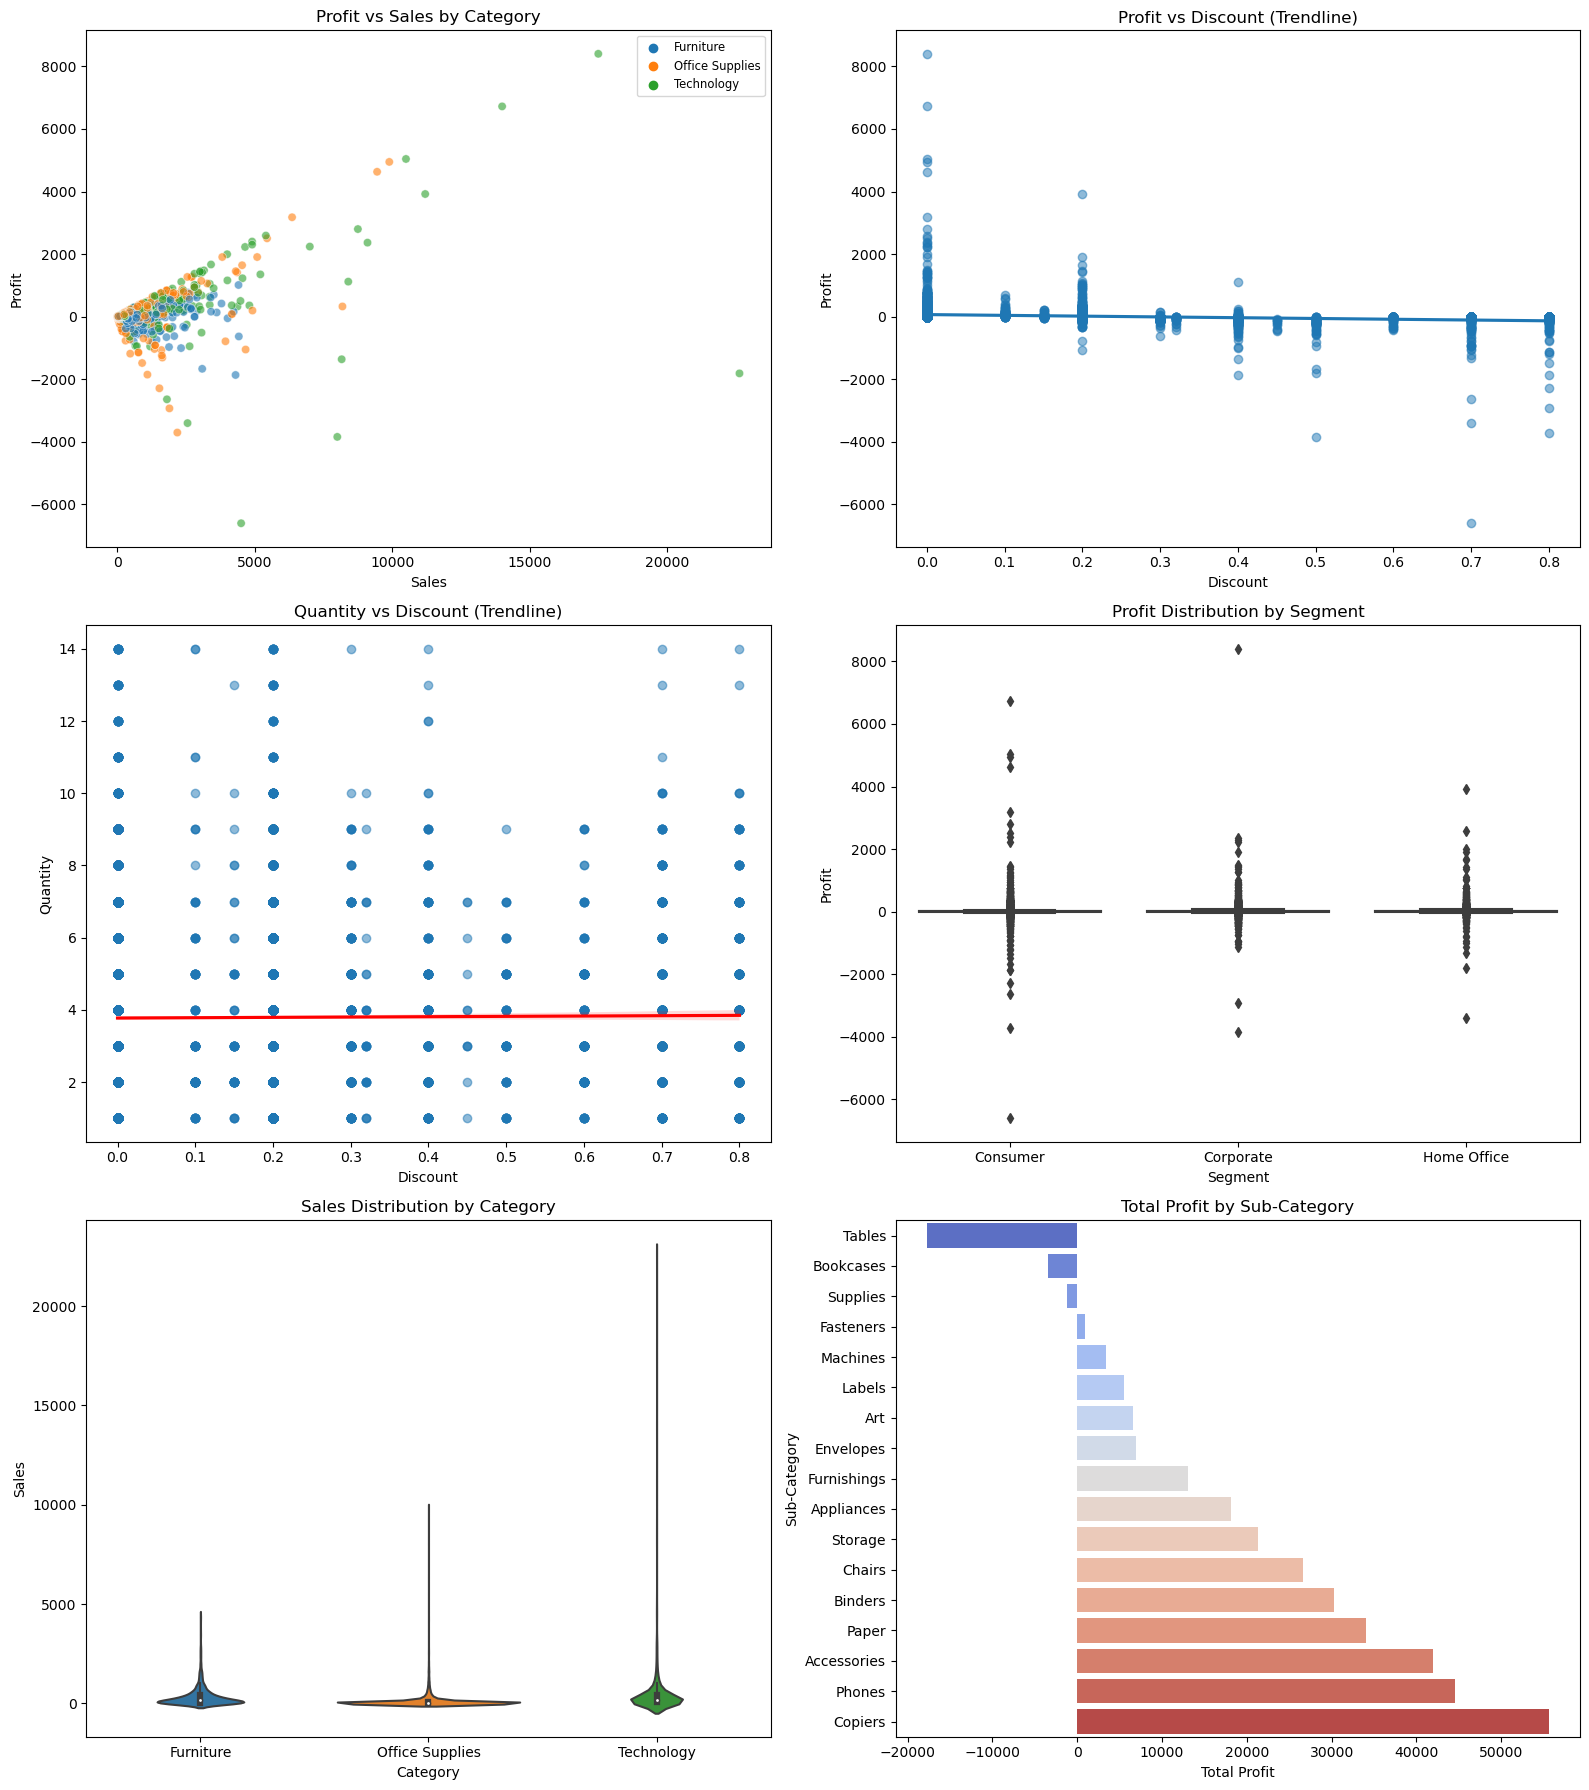

In [9]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(16, 18))  # Adjust figure size
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # More spacing

# 1. Profit vs Sales (Scatter by Category)
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.6)
plt.title("Profit vs Sales by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(loc='best', fontsize='small')

# 2. Discount vs Profit (Scatter with trendline)
plt.subplot(3, 2, 2)
sns.regplot(data=df, x='Discount', y='Profit', scatter_kws={'alpha': 0.5})
plt.title("Profit vs Discount (Trendline)")
plt.xlabel("Discount")
plt.ylabel("Profit")

# 3. Discount vs Quantity (Scatter with trendline)
plt.subplot(3, 2, 3)
sns.regplot(data=df, x='Discount', y='Quantity', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title("Quantity vs Discount (Trendline)")
plt.xlabel("Discount")
plt.ylabel("Quantity")

# 4. Box Plot: Profit by Segment
plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='Segment', y='Profit')
plt.title("Profit Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Profit")

# 5. Violin Plot: Sales by Category
plt.subplot(3, 2, 5)
sns.violinplot(data=df, x='Category', y='Sales', inner='box')
plt.title("Sales Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Sales")

# 6. Bar Plot: Profit by Sub-Category (Sorted)
plt.subplot(3, 2, 6)
sns.barplot(x=subcat_profit.values, y=subcat_profit.index, palette='coolwarm')
plt.title("Total Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")

# Save combined plot
plt.tight_layout()
plt.savefig("plots/all_insightful_plots_grid.png")
plt.show()

Observation:
- Profit vs. Discount shows that higher discounts often reduce profit.
- Profit vs. Sales by category:
    - Technology appears to yield more consistent profits.
    - Furniture shows high sales but low/negative profit (poor margin).
- Sub-category Profitability:
    - Copiers, Phones, and Accessories generate the most profit.
    - Tables and Bookcases have negative total profit – possible candidates for discontinuation or strategic overhaul.

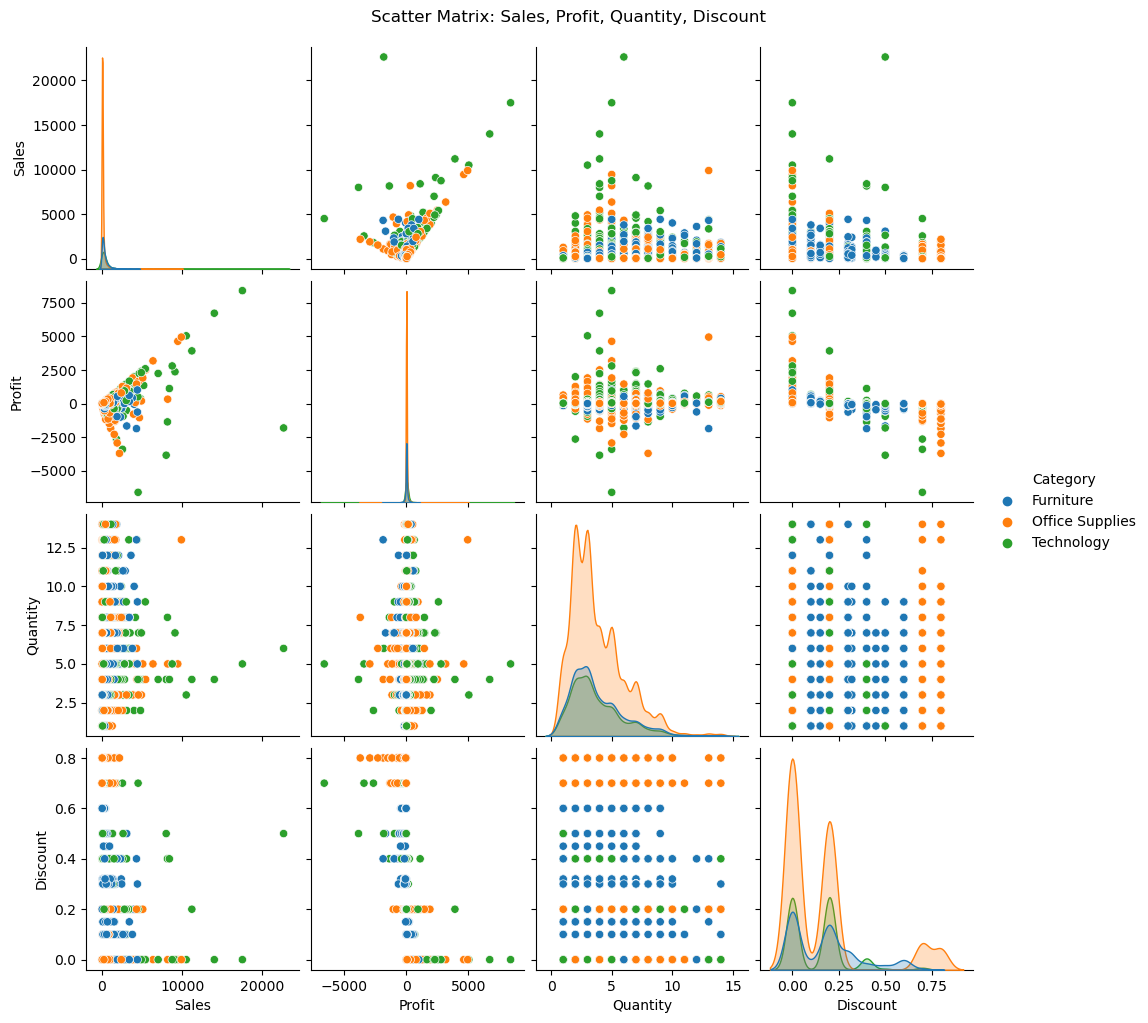

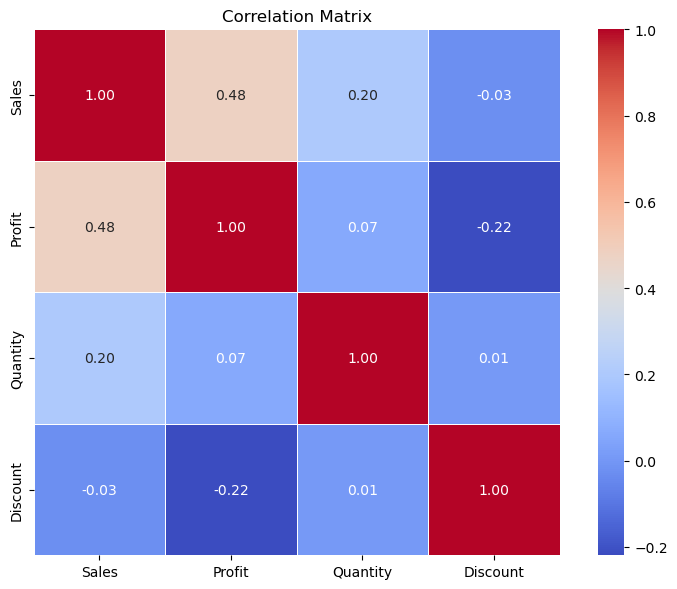

In [10]:
# Pairwise scatter matrix (numeric)
sns.pairplot(df, vars=['Sales', 'Profit', 'Quantity', 'Discount'], hue='Category', diag_kind='kde')
plt.suptitle('Scatter Matrix: Sales, Profit, Quantity, Discount', y=1.02)
plt.savefig("plots/scatter_matrix.png")
plt.show()

# Correlation heatmap
corr = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png")
plt.show()

Observaation:
- Technology products show higher variability and outliers in sales and profit.
- Negative profits are often associated with Furniture and Office Supplies, especially when discounts are applied.
- Discounts > 0.5 almost always lead to losses, regardless of category.
- Profit has a negative correlation with Discount (-0.22) — indicating high discounts hurt profitability.
- Sales and Profit are moderately correlated (0.48) — not every sale brings proportionate profit.
- Discount doesn't correlate with Sales, suggesting that discounts may not boost sales significantly.

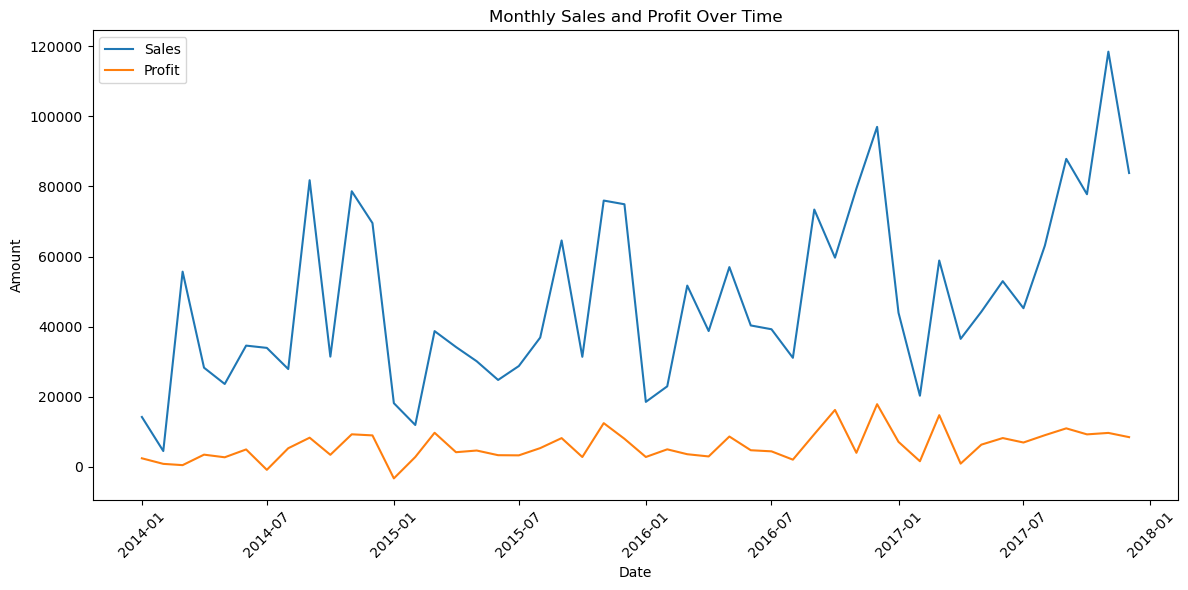

In [11]:
# Prepare monthly time series
df['YearMonth'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
monthly = df.groupby('YearMonth').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x='YearMonth', y='Sales', label='Sales')
sns.lineplot(data=monthly, x='YearMonth', y='Profit', label='Profit')
plt.title('Monthly Sales and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("plots/line_monthly_sales_profit.png")
plt.show()

Observation:
- Clear seasonal or cyclical patterns are visible.
- Sharp spikes in sales (likely due to promotions, holidays, or peak shopping seasons).
- Profit exhibits more volatility, occasionally dropping into the negative.

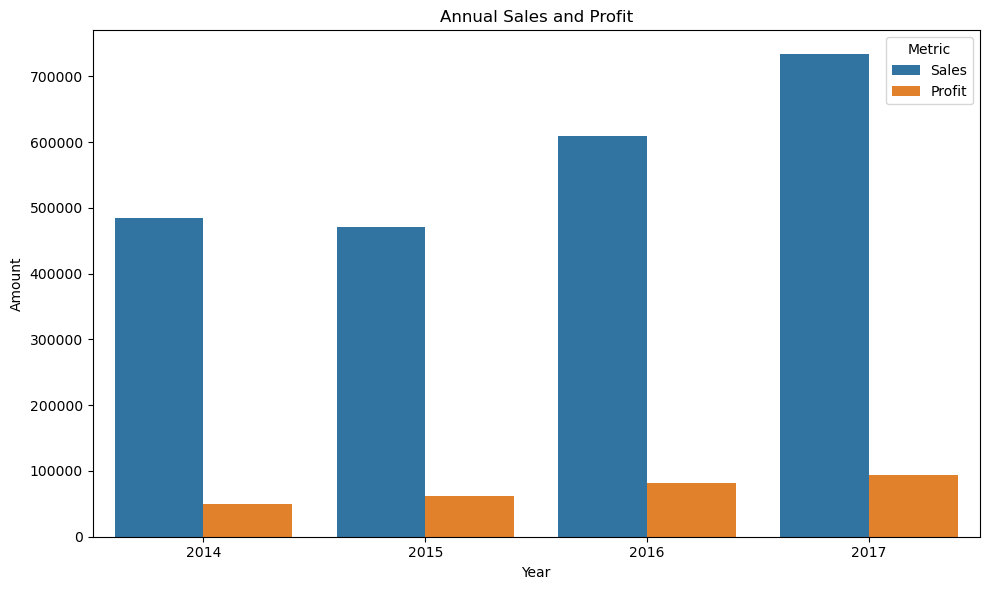

In [12]:
# Prepare yearly data
yearly = df.groupby('Order Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Melt to long format for grouped bar
yearly_melted = pd.melt(yearly, id_vars='Order Year', value_vars=['Sales', 'Profit'], 
                        var_name='Metric', value_name='Amount')

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_melted, x='Order Year', y='Amount', hue='Metric')
plt.title('Annual Sales and Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig("plots/bar_yearly_sales_profit.png")
plt.show()


Observation:
- Sales and profit increased consistently from 2015 to 2017.
- 2015 saw a slight dip in both sales and profit compared to 2014.
- 2017 had the highest sales (~730K) and highest profit (~95K).
- Sales growth outpaced profit, suggesting rising costs or discounting.

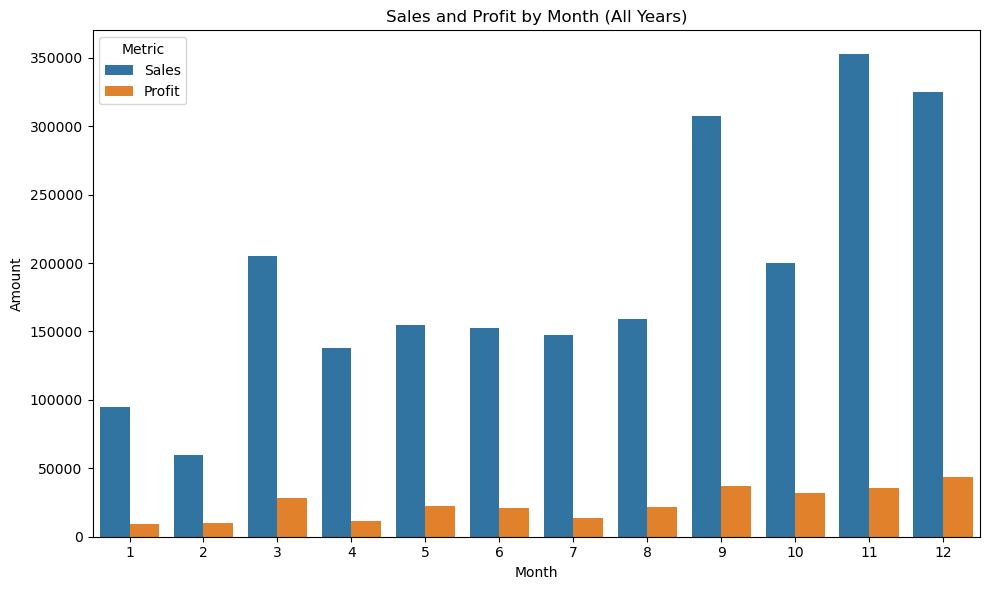

In [13]:
# Prepare monthly aggregate (all years combined)
monthly_totals = df.groupby('Order Month').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index().sort_values('Order Month')

# Melt for grouped bar
monthly_melted = pd.melt(monthly_totals, id_vars='Order Month', value_vars=['Sales', 'Profit'],
                         var_name='Metric', value_name='Amount')

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_melted, x='Order Month', y='Amount', hue='Metric')
plt.title('Sales and Profit by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig("plots/bar_sales_profit_by_month.png")
plt.show()

Observations:
- November (Month 11) and December (Month 12) are peak months for sales and profit.
- September (Month 9) also sees a sharp increase in both metrics.
- January (Month 1) and February (Month 2) are the lowest-performing months in both sales and profit.

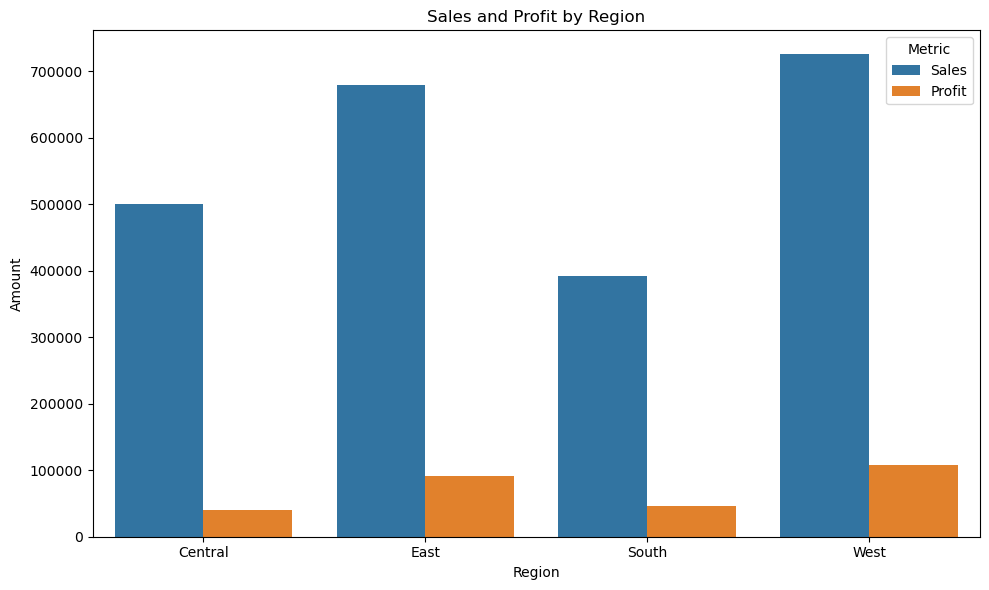

In [14]:
region_summary = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
region_melted = pd.melt(region_summary, id_vars='Region', value_vars=['Sales', 'Profit'],
                        var_name='Metric', value_name='Amount')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=region_melted, x='Region', y='Amount', hue='Metric')
plt.title('Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig("plots/bar_region_sales_profit.png")
plt.show()

Observations:
- West Region has the highest sales (~ ₹720K) and also the highest profit (~ ₹110K).
- East Region follows closely in sales (~ ₹680K) and has a strong profit (~ ₹90K).
- Central Region has moderate sales (~ ₹500K) but very low profit (~ ₹40K) — suggesting poor margins or high costs.
- South Region shows the lowest sales (~ ₹390K) and low profit (~ ₹45K).

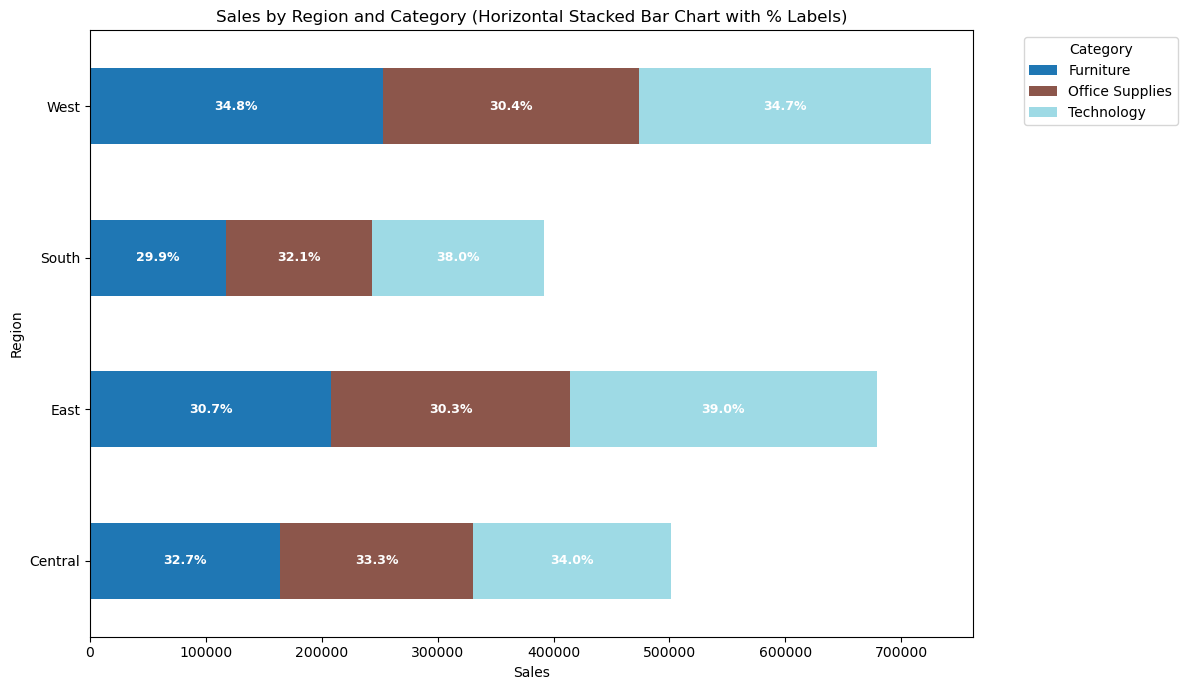

In [15]:
# Prepare data: pivot to get categories as columns
region_cat_sales = df.groupby(['Region', 'Category'])['Sales'].sum().unstack(fill_value=0)

# Calculate total sales per region for percentage calculation
region_totals = region_cat_sales.sum(axis=1)

# Plot horizontal stacked bar chart
ax = region_cat_sales.plot(kind='barh', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Sales by Region and Category (Horizontal Stacked Bar Chart with % Labels)')
plt.ylabel('Region')
plt.xlabel('Sales')

# Add percentage labels inside bars
for i, region in enumerate(region_cat_sales.index):
    left = 0
    for category in region_cat_sales.columns:
        val = region_cat_sales.loc[region, category]
        if val > 0:
            pct = val / region_totals[region] * 100
            x = left + val / 2
            y = i
            label = f"{pct:.1f}%"
            # Only show label if wide enough
            if val / region_totals[region] > 0.05:
                ax.text(x, y, label, ha='center', va='center', color='white', fontsize=9, fontweight='bold')
            left += val

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("plots/horizontal_stacked_bar_sales_region_category_pct.png")
plt.show()

Observation:
- Technology contributes a significant portion of sales in every region (highest in East at 39%).
- Furniture has a strong presence in the West (34.8%) and Central (32.7%) regions.
- Office Supplies is fairly balanced but peaks in Central (33.3%).

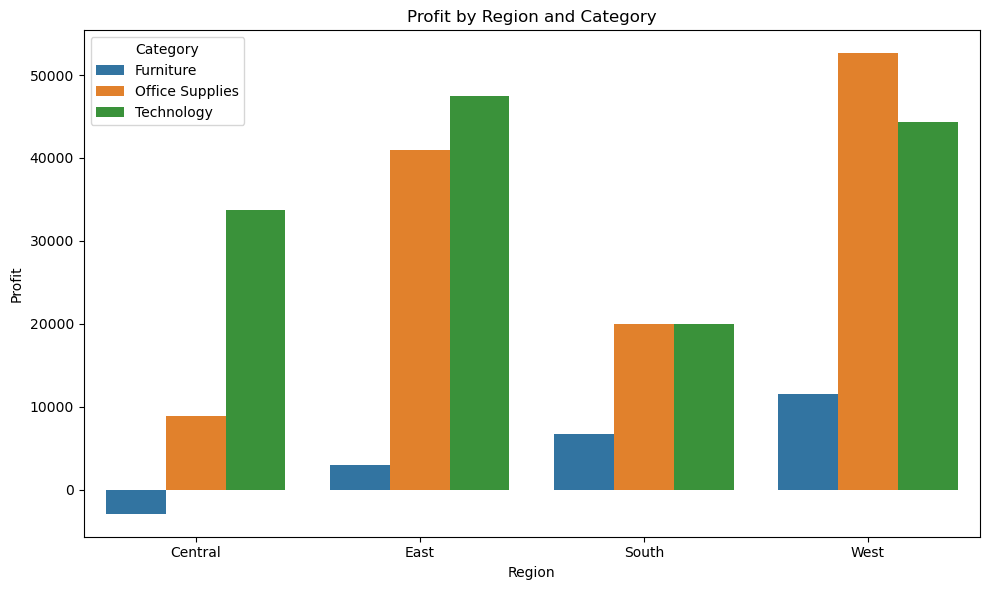

In [16]:
# Prepare data
reg_cat = df.groupby(['Region', 'Category'])['Profit'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=reg_cat, x='Region', y='Profit', hue='Category')
plt.title('Profit by Region and Category')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.tight_layout()
plt.savefig("plots/bar_region_category_profit.png")
plt.show()

Observation:
- West region is the most profitable, with high profits across all categories.
- Technology is the most profitable category in every region.
- Furniture in Central has a negative profit (loss), suggesting high costs or pricing issues.  

Reassess Furniture pricing and supply chain in Central.  
Invest more in Technology category, especially in West and East.

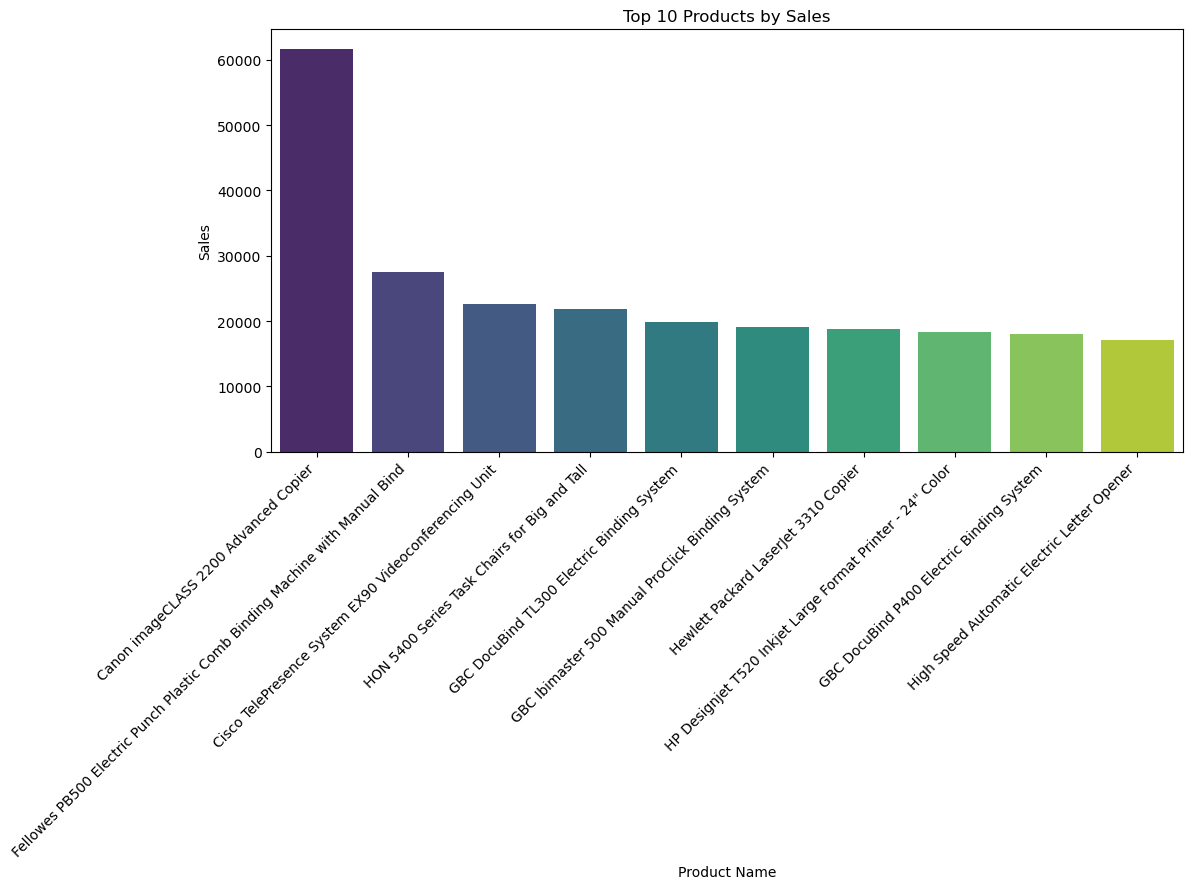

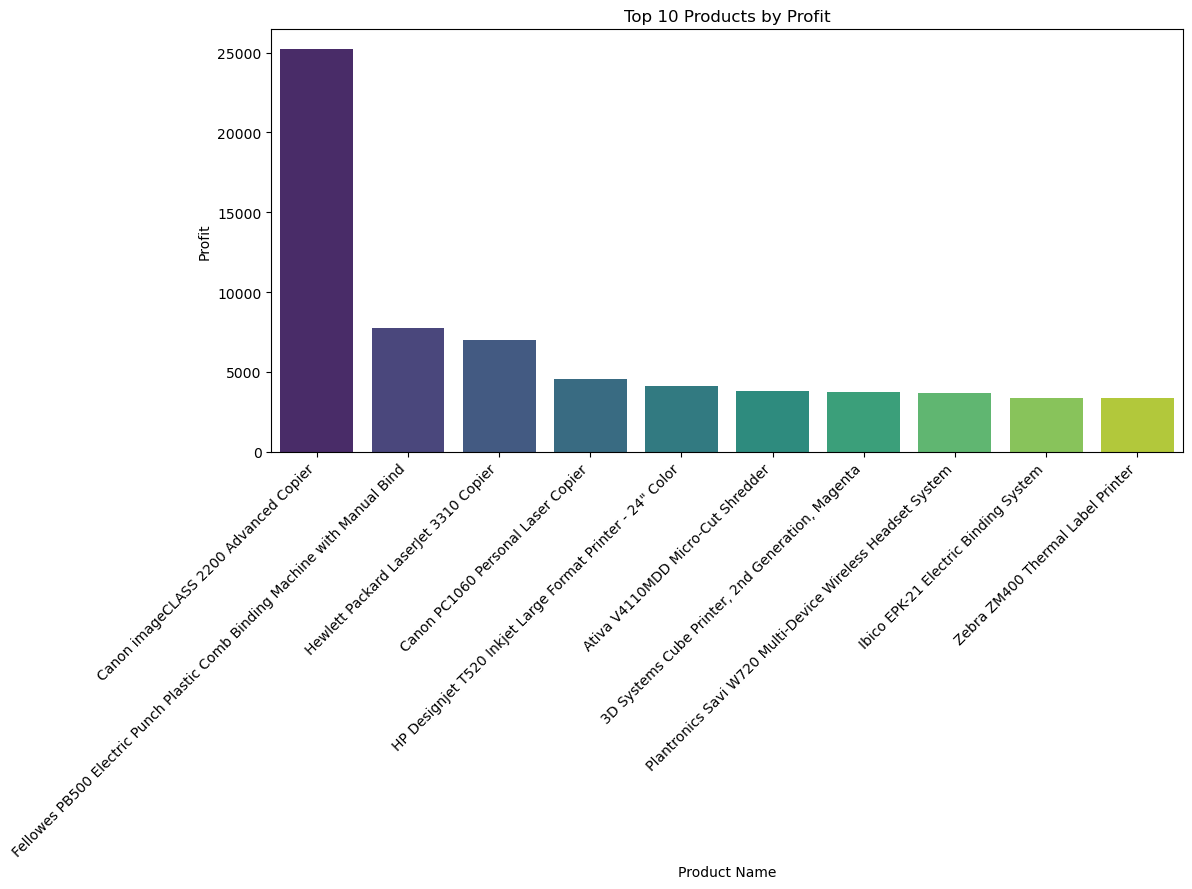

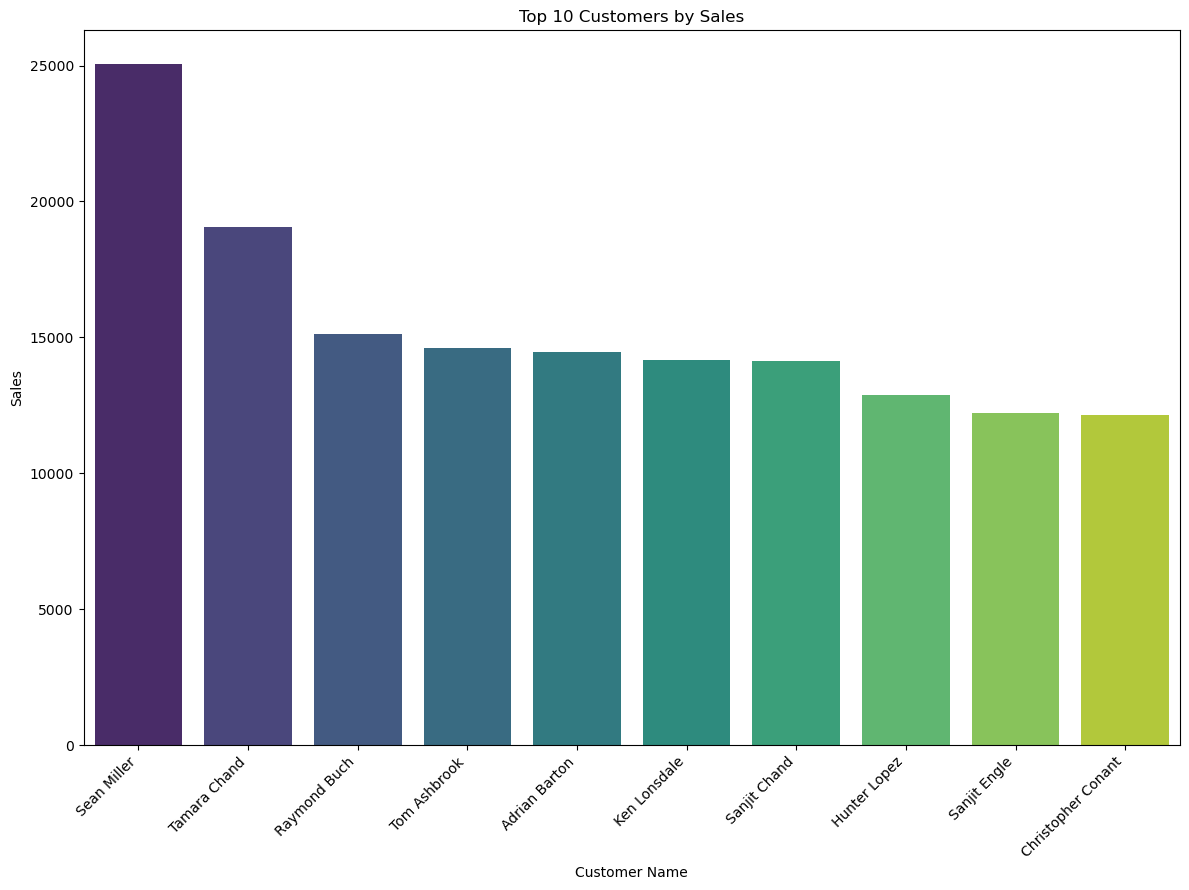

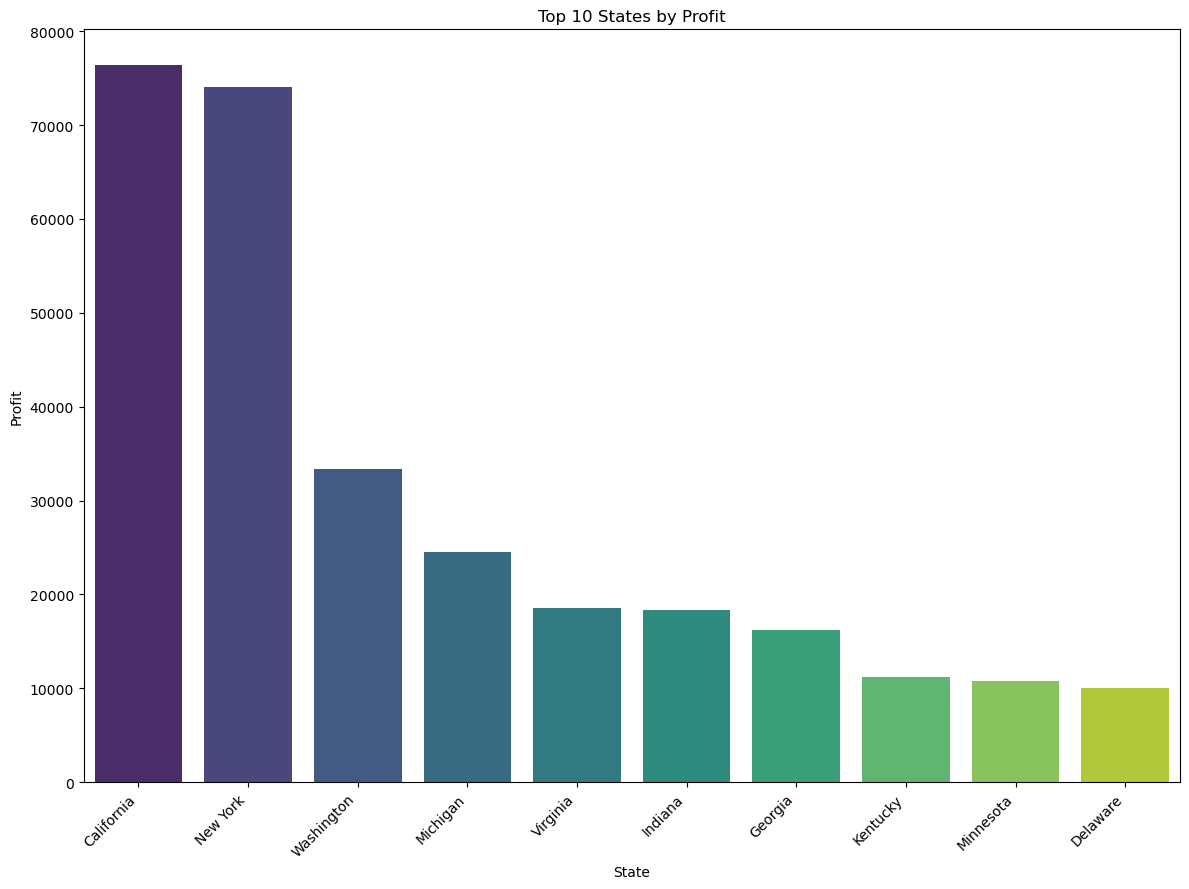

In [17]:
def plot_top10(data, x_col, y_col, title, filename, rotation=45):
    plt.figure(figsize=(12, 9))
    sns.barplot(data=data, x=x_col, y=y_col, palette='viridis')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.savefig(f"plots/{filename}")
    plt.show()

# Top 10 Products by Sales
prod_sales = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
plot_top10(prod_sales, 'Product Name', 'Sales', 'Top 10 Products by Sales', 'bar_top10_products_sales.png')

# Top 10 Products by Profit
prod_profit = df.groupby('Product Name')['Profit'].sum().nlargest(10).reset_index()
plot_top10(prod_profit, 'Product Name', 'Profit', 'Top 10 Products by Profit', 'bar_top10_products_profit.png')

# Top 10 Customers by Sales
cust_sales = df.groupby('Customer Name')['Sales'].sum().nlargest(10).reset_index()
plot_top10(cust_sales, 'Customer Name', 'Sales', 'Top 10 Customers by Sales', 'bar_top10_customers_sales.png')

# Top 10 States by Profit
state_profit = df.groupby('State')['Profit'].sum().nlargest(10).reset_index()
plot_top10(state_profit, 'State', 'Profit', 'Top 10 States by Profit', 'bar_top10_states_profit.png')

Observation:
- Canon ImageCLASS 2200 Advanced Copier dominates with >₹60,000 in sales.
- Videoconferencing Units and Binding Machines also perform well.
- Again, Canon ImageCLASS 2200 tops the list by profit—it’s both high-selling and high-margin.
- Sean Miller is the top customer, followed by Tamara Chand and Raymond Buch. The difference between customers is relatively tight after the first two.
- California and New York dominate profitability (₹75K+). The gap after these two is significant.

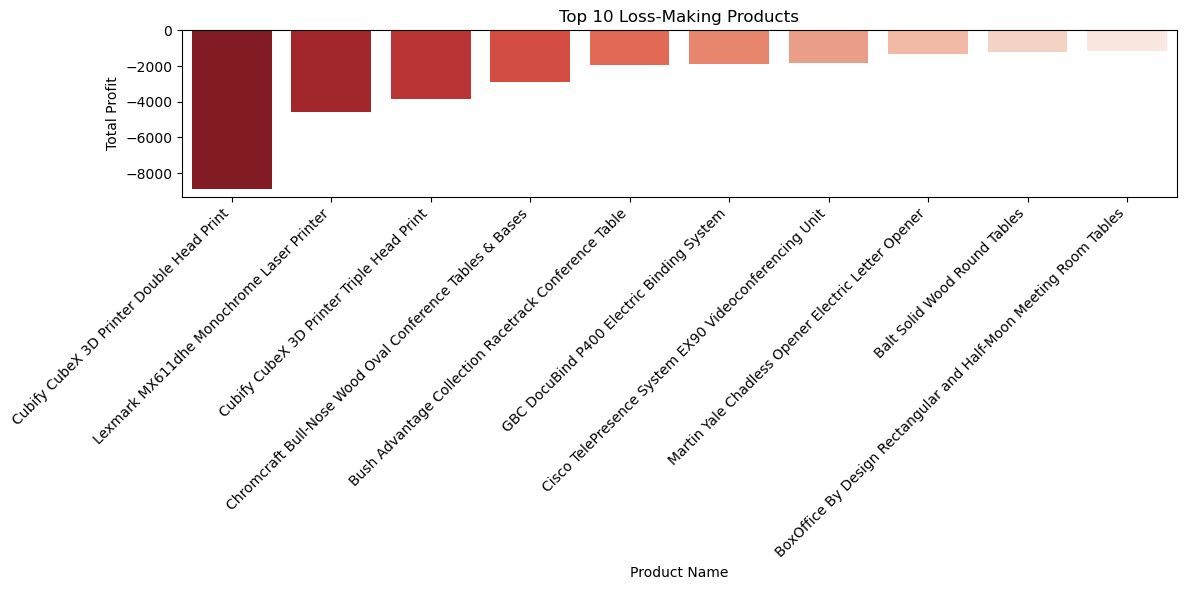

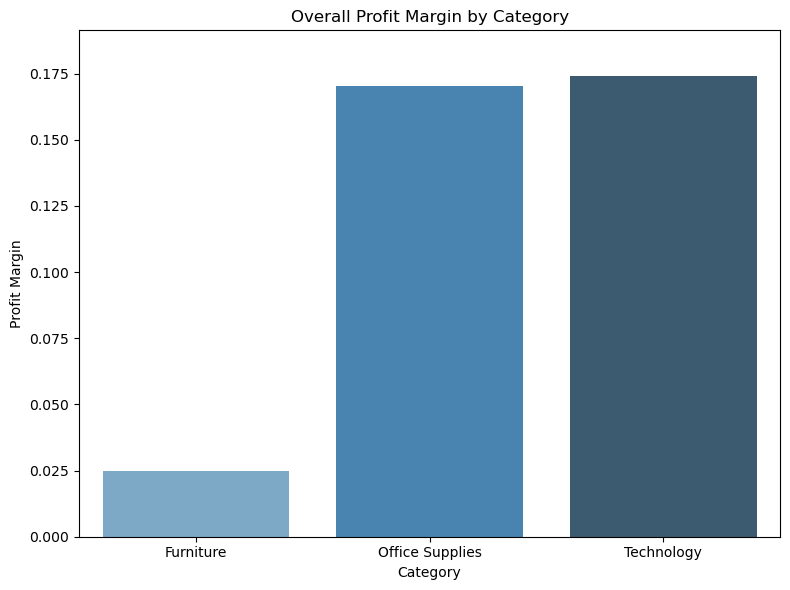

In [18]:
# Top 10 Loss-Making Products (Negative Total Profit)
neg_products = df.groupby('Product Name')['Profit'].sum().reset_index()
neg_products = neg_products[neg_products['Profit'] < 0].sort_values('Profit').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=neg_products, x='Product Name', y='Profit', palette='Reds_r')
plt.title('Top 10 Loss-Making Products')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plots/bar_top10_loss_products.png")
plt.show()


# Overall Profit Margin by Category
cat_margin = df.groupby('Category').apply(lambda x: x['Profit'].sum()/x['Sales'].sum()).reset_index(name='ProfitMargin')

plt.figure(figsize=(8, 6))
sns.barplot(data=cat_margin, x='Category', y='ProfitMargin', palette='Blues_d')
plt.title('Overall Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.ylim(0, cat_margin['ProfitMargin'].max()*1.1)  # Add some headroom
plt.tight_layout()
plt.savefig("plots/bar_category_profit_margin.png")
plt.show()

Observation: 
- Cubify 3D Printers (Double and Triple Head Print) are massive loss-makers.
- Lexmark MX611dhe Monochrome Laser Printer also performs poorly.
- Some conference tables and binding units also show negative profit.
- Technology and Office Supplies have strong profit margins (~17%–18%).
- Furniture has a very low margin (~2.5%).

In [19]:
corr_matrix = df[['Sales','Profit','Discount','Quantity']].corr()
print(corr_matrix.loc['Discount',['Sales','Profit','Quantity']])


Sales      -0.028190
Profit     -0.219487
Quantity    0.008623
Name: Discount, dtype: float64


In [20]:
corr = df[['Sales','Profit','Discount','Quantity']].corr()
corr_discount = corr.loc['Discount',['Sales','Profit','Quantity']]
print("Correlation with Discount:\n", corr_discount)


Correlation with Discount:
 Sales      -0.028190
Profit     -0.219487
Quantity    0.008623
Name: Discount, dtype: float64
